<a href="https://colab.research.google.com/github/K-JAYASREE/Python/blob/main/Welcome_To_Colaboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Mini Project - 1 ***

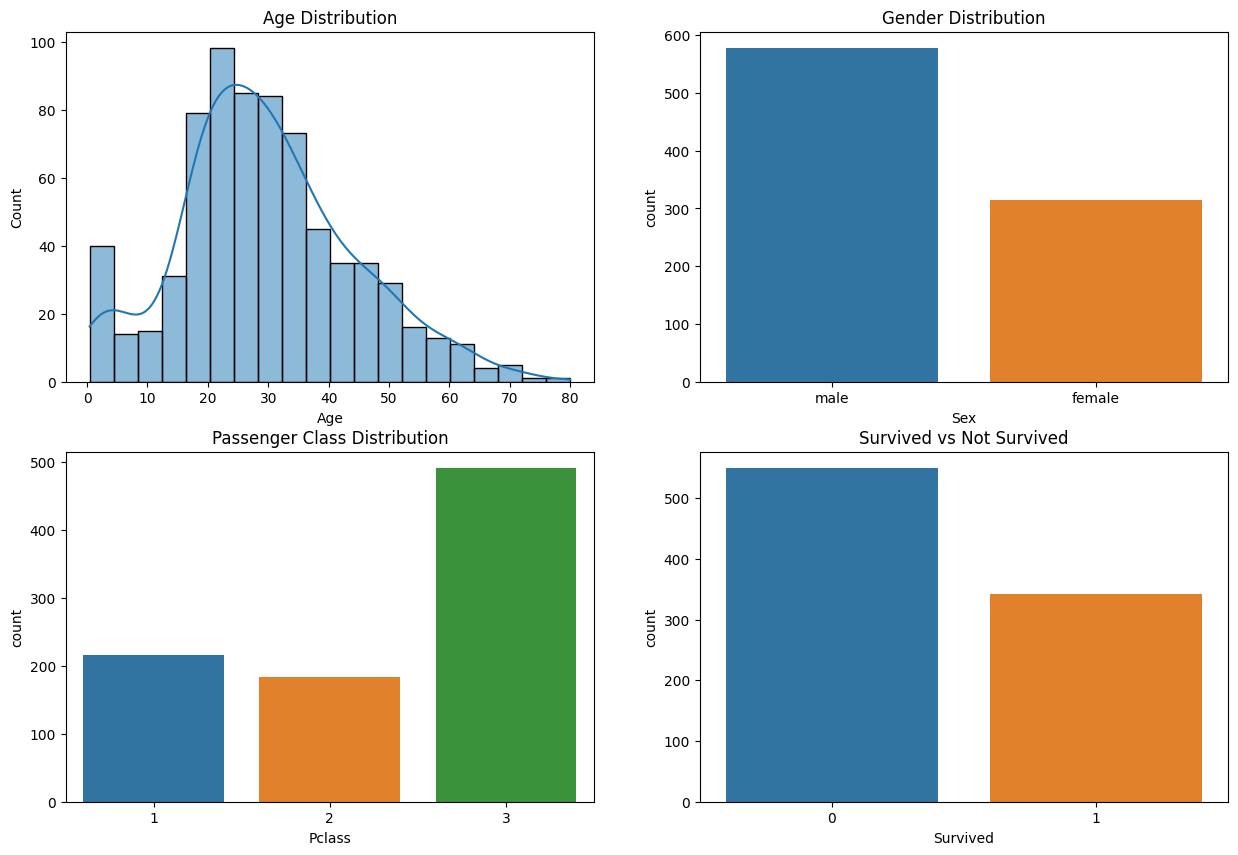

<Figure size 1000x800 with 0 Axes>

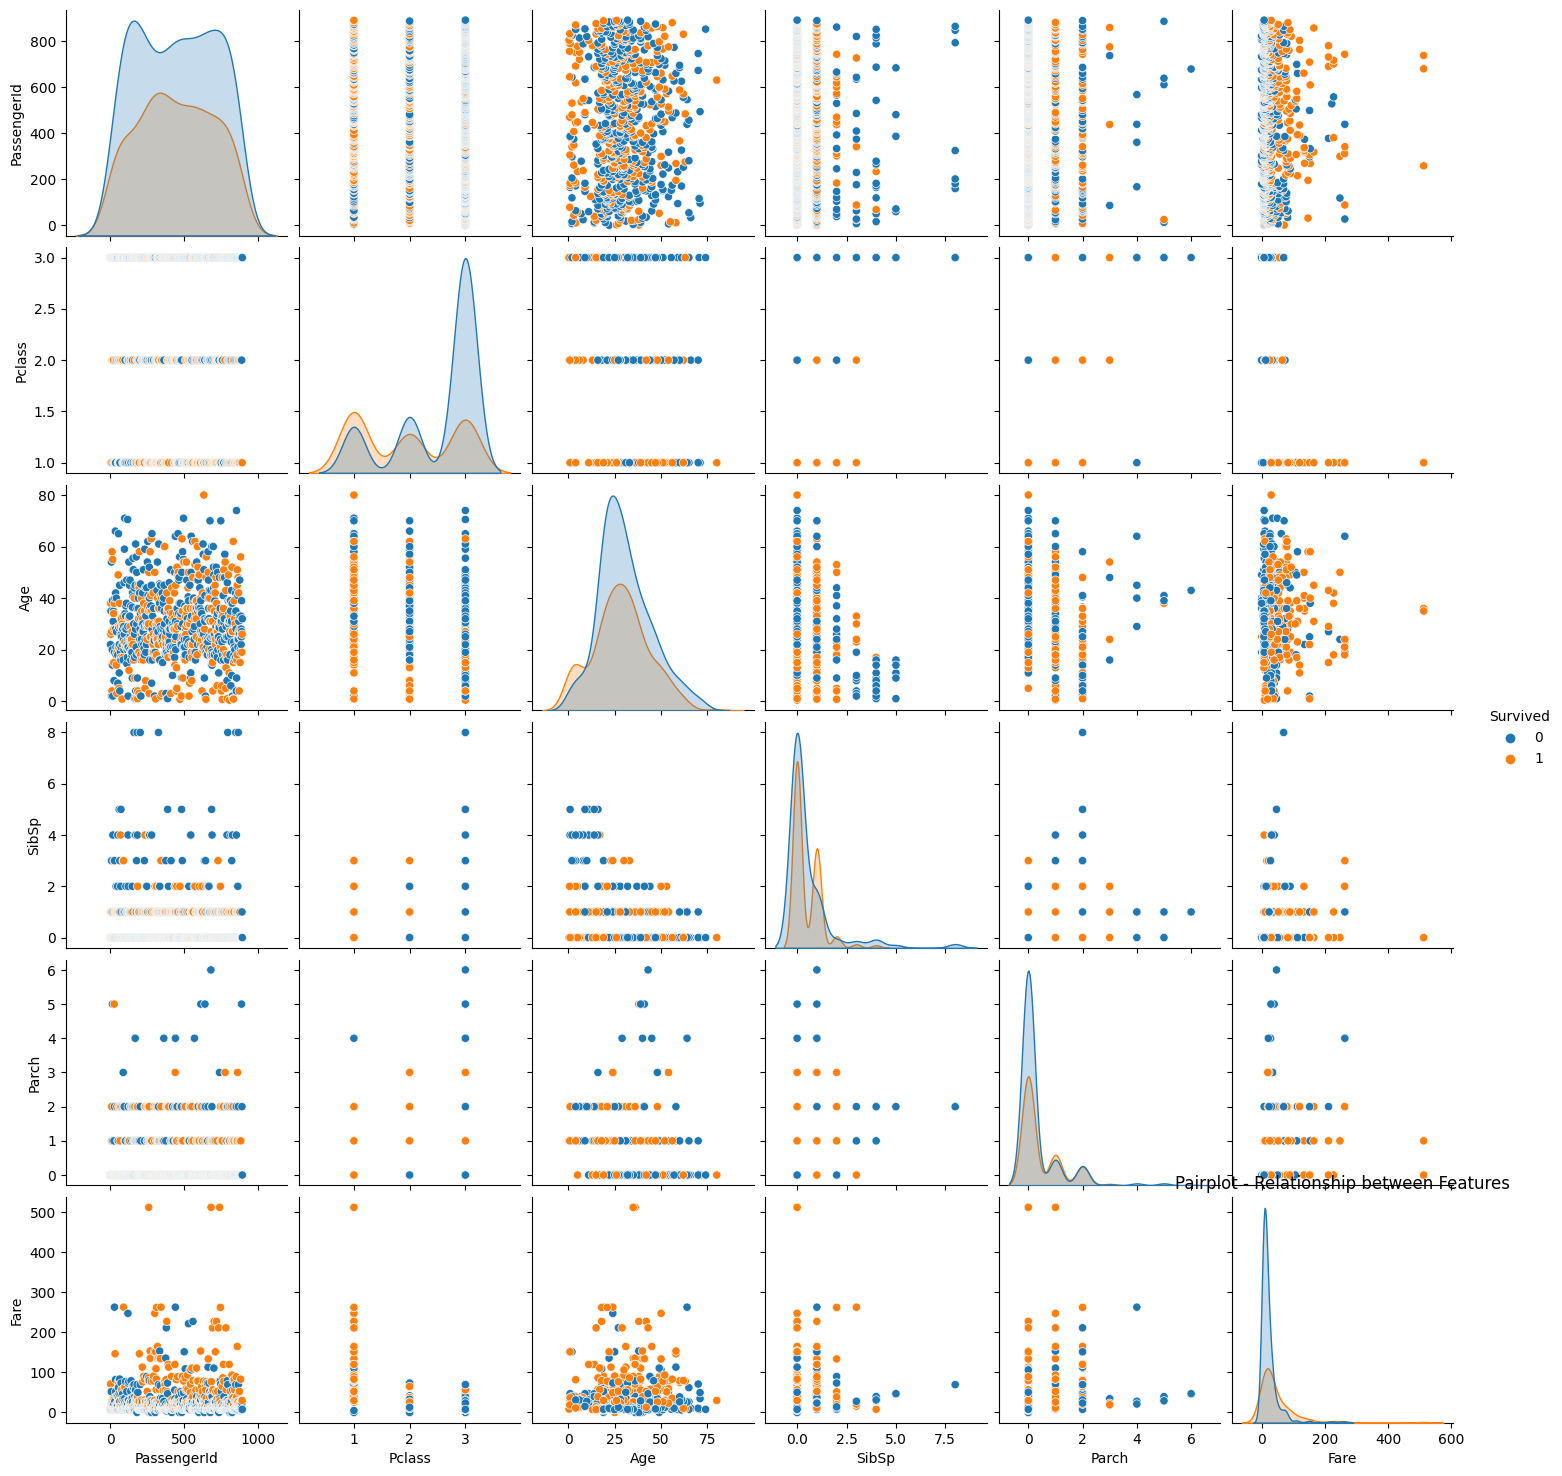

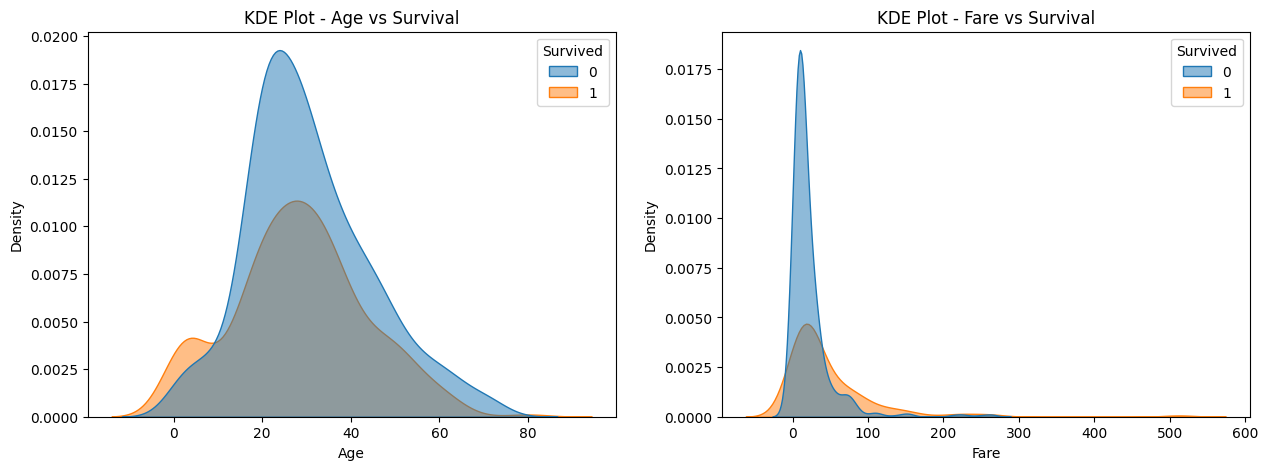

<ipython-input-37-74387aaf6a67>:55: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


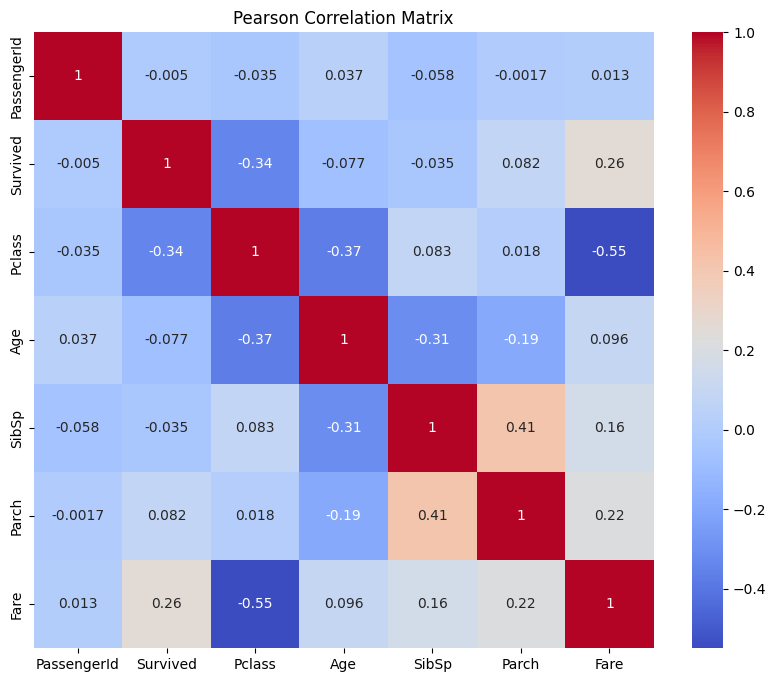

Cross-validation Scores: [0.7877095  0.80337079 0.85393258 0.79213483 0.8258427 ]
Mean Cross-validation Score: 0.8125980792166217


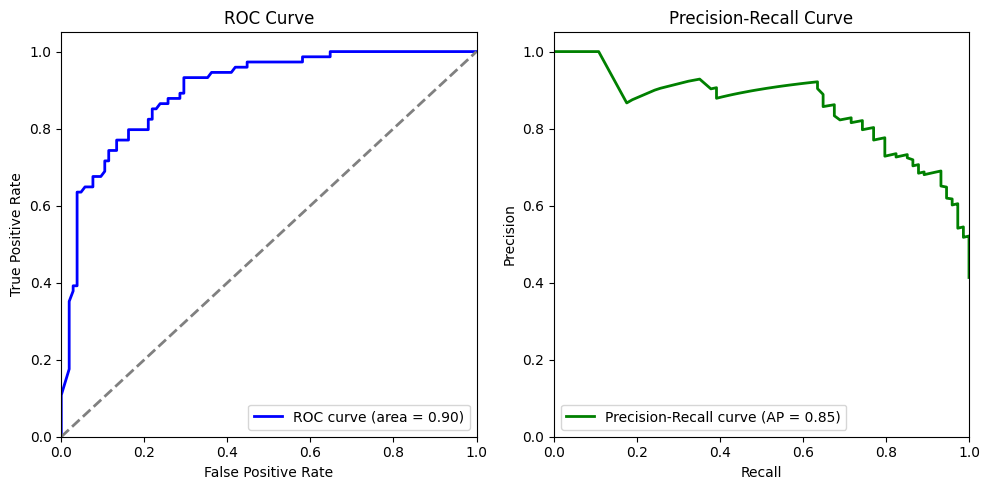

   PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         1
4          896         0


In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, precision_recall_curve, auc, average_precision_score
from sklearn.pipeline import Pipeline


train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Step 3: EDA (Exploratory Data Analysis)
def perform_eda(df):
    # Univariate analysis - Plotting distributions of features
    plt.figure(figsize=(15, 10))
    plt.subplot(2, 2, 1)
    sns.histplot(df['Age'], bins=20, kde=True)
    plt.title('Age Distribution')

    plt.subplot(2, 2, 2)
    sns.countplot(data=df, x='Sex')
    plt.title('Gender Distribution')

    plt.subplot(2, 2, 3)
    sns.countplot(data=df, x='Pclass')
    plt.title('Passenger Class Distribution')

    plt.subplot(2, 2, 4)
    sns.countplot(data=df, x='Survived')
    plt.title('Survived vs Not Survived')
    plt.show()

    # Multivariate analysis - Pairplots to visualize relationships between features
    plt.figure(figsize=(10, 8))
    sns.pairplot(df, hue='Survived')
    plt.title('Pairplot - Relationship between Features')
    plt.show()

    # Kernel Density Estimation (KDE) plots
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    sns.kdeplot(data=df, x='Age', hue='Survived', fill=True, alpha=0.5)
    plt.title('KDE Plot - Age vs Survival')

    plt.subplot(1, 2, 2)
    sns.kdeplot(data=df, x='Fare', hue='Survived', fill=True, alpha=0.5)
    plt.title('KDE Plot - Fare vs Survival')
    plt.show()

    # Pearson Correlation
    corr_matrix = df.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
    plt.title('Pearson Correlation Matrix')
    plt.show()

perform_eda(train_df)

# Step 4: Data Preprocessing
def data_preprocessing(df):
    # Impute missing values for 'Age' and 'Fare'
    imputer = SimpleImputer(strategy='median')
    df['Age'] = imputer.fit_transform(df[['Age']])
    df['Fare'] = imputer.fit_transform(df[['Fare']])

    # Create new features
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
    df['IsAlone'] = np.where(df['FamilySize'] == 1, 1, 0)

    # Encode categorical variables
    label_encoder = LabelEncoder()
    df['Sex'] = label_encoder.fit_transform(df['Sex'])
    df['Embarked'] = label_encoder.fit_transform(df['Embarked'].astype(str))

    # One-hot encode 'Pclass'
    df = pd.get_dummies(df, columns=['Pclass'], drop_first=True)

    return df

train_df = data_preprocessing(train_df)

# Step 5: Cross-validation
X = train_df.drop(['Survived', 'PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
y = train_df['Survived']

model = RandomForestClassifier(random_state=42)
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

print('Cross-validation Scores:', cv_scores)
print('Mean Cross-validation Score:', np.mean(cv_scores))

# Step 6: Use ROC curve and Precision/Recall for model's metric
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)

# ROC curve
y_prob = model.predict_proba(X_val)[:, 1]
fpr, tpr, _ = roc_curve(y_val, y_prob)
roc_auc = auc(fpr, tpr)

# Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_val, y_prob)
average_precision = average_precision_score(y_val, y_prob)

# Plot ROC curve and Precision-Recall curve
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(recall, precision, color='green', lw=2, label='Precision-Recall curve (AP = %0.2f)' % average_precision)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')

plt.tight_layout()
plt.show()

# Step 7: Inference pipeline
def inference_pipeline(model, test_df):
    test_df = data_preprocessing(test_df)
    X_test = test_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
    predictions = model.predict(X_test)
    submission_df = pd.DataFrame({'PassengerId': test_df['PassengerId'], 'Survived': predictions})
    return submission_df

# Example usage of inference pipeline
submission_df = inference_pipeline(model, test_df)
print(submission_df.head())
